*To be run on Sage kernel, with eel installed*

In [1]:
from hourglass import HourglassPlabicGraph as HPG

# retreive example data for cons tructor 
from examples import example_2, example_1, benzene_debug, benzene_and_square
g1, g2, bns, bd = example_1(), example_2(), benzene_and_square(), benzene_debug()

hpg = HPG(graph=g2, use_notebook=True)
hpg2 = HPG(graph=g1, use_notebook=True)
hpg3 = HPG(graph=bns, use_notebook=True)
hpg4 = HPG(graph=bd, use_notebook=True)

# hpg.editor()

In [2]:
(hpg == hpg2)

True

In [3]:
hpg.isomorphism(hpg2)

{'vertices': {8: 19,
  9: 4,
  10: 5,
  11: 6,
  12: 7,
  13: 9,
  14: 10,
  15: 11,
  0: 12,
  1: 13,
  2: 8,
  3: 14,
  4: 15,
  5: 16,
  6: 17,
  7: 18,
  27: 20,
  22: 22,
  28: 21,
  29: 25,
  20: 26,
  23: 29,
  18: 28,
  16: 32,
  17: 31,
  19: 27,
  25: 33,
  24: 30,
  21: 24,
  26: 23},
 'edges': {(8, 7, 1): (19, 18, 1),
  (8, 27, 1): (19, 20, 1),
  (8, 9, 1): (19, 4, 1),
  (9, 8, 1): (4, 19, 1),
  (9, 28, 1): (4, 21, 1),
  (9, 10, 1): (4, 5, 1),
  (10, 9, 1): (5, 4, 1),
  (10, 28, 1): (5, 21, 1),
  (10, 11, 1): (5, 6, 1),
  (11, 10, 1): (6, 5, 1),
  (11, 29, 1): (6, 25, 1),
  (11, 12, 1): (6, 7, 1),
  (12, 11, 1): (7, 6, 1),
  (12, 23, 1): (7, 29, 1),
  (12, 13, 1): (7, 9, 1),
  (13, 12, 1): (9, 7, 1),
  (13, 16, 1): (9, 32, 1),
  (13, 14, 1): (9, 10, 1),
  (14, 13, 1): (10, 9, 1),
  (14, 16, 1): (10, 32, 1),
  (14, 15, 1): (10, 11, 1),
  (15, 14, 1): (11, 10, 1),
  (15, 16, 1): (11, 32, 1),
  (15, 0, 1): (11, 12, 1),
  (0, 15, 1): (12, 11, 1),
  (0, 17, 1): (12, 31, 1),
  (0

In [5]:
hpg.editor()

Editor Closed.


In [6]:
hpg2.editor()

Editor Closed.


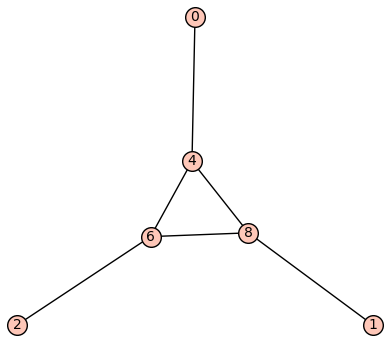

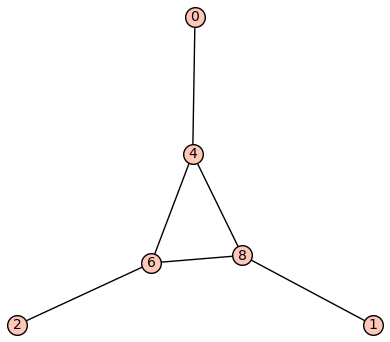

In [7]:
hpg.conv_to_sage().show()
hpg2.conv_to_sage().show()

In [13]:
(hpg == hpg2)

True